In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import matplotlib as mpl
from tqdm import tqdm

In [2]:
# Punto 1. Relajación con LaPlace
Min, Max, N = 0.,20.,51
x = np.linspace(Min,Max,N)
y = x.copy()
h = x[1]-x[0]

def h1(y):
    return 0.
def h2(y):
    return 0.
def h3(x):
    return 10.
def h4(x):
    return 0.

def InitT():
    
    T = np.zeros((N,N))
    
    T[0,:] = h1(y)
    T[-1,:] = h2(y)
    
    T[:,0] = h3(x)
    T[:,-1] = h4(x)
    
    return T

T = InitT()


def GetRelaxation(T, omega, Nit = int(1e5), tolerancia = 1e-2):
    
    itmax = 0
    
    for it in range(Nit):
        
        dmax = 0.
        
        for i in range(1, len(x)-1):
            for j in range(1, len(y)-1):
                tmp = 0.25*(T[i+1,j]+T[i-1,j]+T[i,j+1]+T[i,j-1] )
                r = omega*(tmp - T[i,j])
                
                T[i,j] += r
                
                if np.abs(r) > dmax:
                    dmax = r
       # print(T)
       # print(it)
        
        if np.abs(dmax) < tolerancia:
            print(it)
            itmax = it
            break  
        
    return T,itmax

In [3]:
# Ahora omega entra como parámetro. Voy a hacer un linspace de 1 a 2, de manera que entren varios omegas.
omegas = np.linspace(1, 1.95, 80) # Se llega únicamente a 1.95 para mostrar bien el comportamiento en estos lugares.
iteraciones = np.zeros(len(omegas))
for i in range(len(omegas)):
    T = InitT()
    resultados, iteraciones[i] = GetRelaxation(T, omegas[i])


197
196
194
193
191
190
188
187
185
184
182
180
179
177
175
174
172
170
169
167
165
164
162
160
158
156
155
153
151
149
147
145
143
141
139
137
135
133
131
129
127
124
122
120
118
115
113
111
108
106
103
101
98
95
93
90
1
1
1
1
1
1
1
1
1
1
1
1
1
45
54
65
67
67
67
101
174
248
472
10343


In [ ]:
# Se observa que hay una región especial en la que los valores son de 1 iteración. Este es el valor de omega que optimiza el proceso

<IPython.core.display.Javascript object>


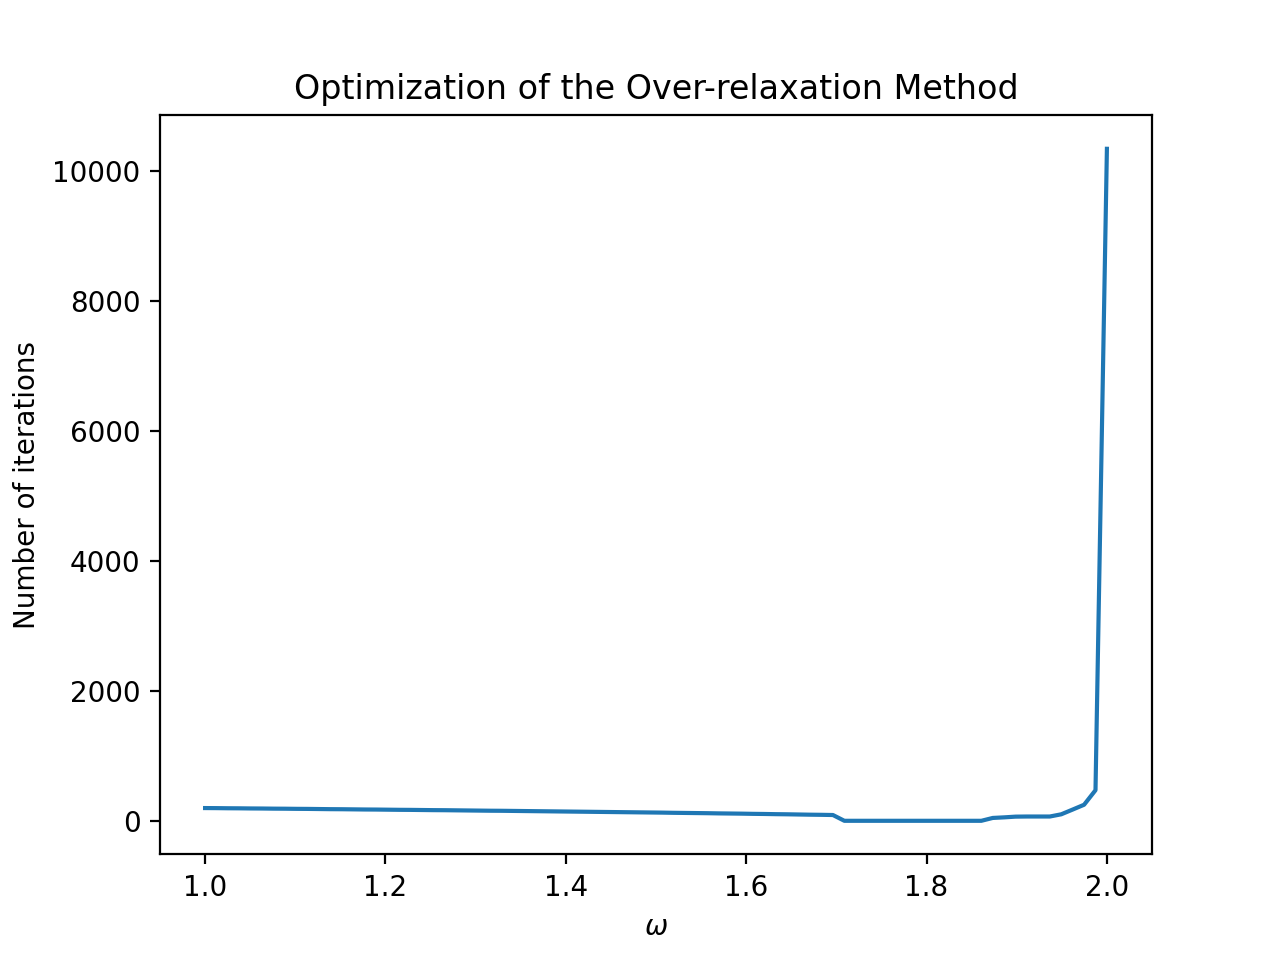

In [4]:
# Graficación
plt.figure()
plt.title('Optimization of the Over-relaxation Method')
plt.plot(omegas, iteraciones)
plt.xlabel('$\omega$')
plt.ylabel('Number of iterations')
plt.show()

In [ ]:
# Si se realiza el proceso con un valor de omega mayor o igual a 2, se llega SIEMPRE al número de iteraciones
#máximas. Esto es, el método nunca converge.

## 2. 2D Navier-Stokes Equation
En este caso, tenemos el sistema de ecuaciones diferenciales parciales no lineales acopladas:
 \begin{equation}
 \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} = -w
 \end{equation}
  
 \begin{equation}
 \nu \left(\frac{\partial^2 w}{\partial x^2} + \frac{\partial^2 w}{\partial y^2}\right) = \frac{\partial u}{\partial y}\frac{\partial w}{\partial x} - \frac{\partial u}{\partial x}\frac{\partial w}{\partial y}
 \end{equation}
 
 Ahora, en diferencias finitas la primera ecuación corresponde a: 
 
 \begin{equation}
 \frac{u_{i+1, j} - 2u_{i, j} + u_{i-1, j}}{{\Delta x}^2} + \frac{u_{i, j+1} - 2u_{i, j} + u_{i, j-1}}{{\Delta y}^2} = -w
 \end{equation}
 y la segunda pasa a ser:
 
  \begin{equation}
 \nu \left(\frac{w_{i+1, j} - 2w_{i, j} + w_{i-1, j}}{{\Delta x}^2} + \frac{w_{i, j+1} - 2w_{i, j} + w_{i, j-1}}{{\Delta y}^2} \right) = \frac{ u_{i, j+1} - u_{i, j-1}}{2\Delta y}\frac{ w_{i+1, j} - w_{i-1, j}}{2\Delta x} - \frac{ u_{i+1, j} - u_{i-1, j}}{2\Delta x}\frac{ w_{i, j+1} - w_{i, j-1}}{2\Delta y}
 \end{equation}
 
 Ahora, consideramos que los pasos para $x$ y $y$ son los mismos e iguales a $h$, por lo que de la primera ecuación despejamos directamente el valor de $u_{i, j}$:
 
 \begin{equation}
 u_{i, j} = \frac{1}{4} \left(u_{i+1, j} + u_{i-1, j} + u_{i, j+1} + u_{i, j-1} + h^2w\right)
 \end{equation}
 
 Por su parte, en la segunda ecuación debemos tener especial cuidado al despejar. En primer lugar, cancelando las $h$ que se multiplican a la izquierda y derecha, queda la ecuación: 
 
 \begin{equation}
 \nu \left( w_{i+1, j} + w_{i-1, j} + w_{i, j+1} + w_{i, j-1} - 4w_{i, j}\right) = \frac{ (u_{i, j+1} - u_{i, j-1})(w_{i+1, j} - w_{i-1, j}) - (u_{i+1, j} - u_{i-1, j})(w_{i, j+1} - w_{i, j-1})}{4}
 \end{equation}
 
Ahora, de manera análoga a la manera en la que se despejó en la primera ecuación, se obtiene:

\begin{equation}
 w_{i, j} = \frac{1}{4} \left(w_{i+1, j} + w_{i-1, j} + w_{i, j+1} + w_{i, j-1}\right) + \frac{1}{16\nu}\left[ -(u_{i, j+1} - u_{i, j-1})(w_{i+1, j} - w_{i-1, j}) + (u_{i+1, j} - u_{i-1, j})(w_{i, j+1} - w_{i, j-1})\right]
 \end{equation}
 

# 3. Condiciones a la frontera

En el presente caso deduciremos las condiciones de frontera superior e inferior; de manera análoga pueden salir las condiciones para las fronteras laterales. 
Para comenzar, de la expansión de Taylor de $u(x,y)$ tenemos lo siguiente: 
$$ u(x,y + h) = u(x,y) + \frac{\partial u}{\partial y} h + \frac{1}{2}\frac{\partial^2 u}{\partial y^2} h^2 + ...$$ 
Dado que el fluido no debe moverse en los bordes, tenemos que para el borde superior $v_x = \frac{\partial u}{\partial y} = 0$. Además, al no haber flujo normal a dicho borde,  $v_y = 0$ y $\frac{\partial v_y}{\partial x} = 0$. Como $w = \frac{\partial v_y}{\partial x} - \frac{\partial v_x}{\partial y}$, entonces $w = -\frac{\partial v_x}{\partial y}$. Reemplazando lo anterior en la serie de Taylor,
$$ u(x,y + h) = u(x,y) - w^2 \frac{h}{2} $$
Y despejando, 
$$ w = -2 \frac{u(x,y + h) - u(x,y)}{h^2} $$
Aplicando diferencias finitas llegamos al resultado final:

$$ w = -2 \frac{u_{i,j+1} - u_{i,j}}{h^2} $$

Análogamente, para el borde inferior se sigue el siguiente proceso: 
$$ u(x,y - h) = u(x,y) - \frac{\partial u}{\partial y} h + \frac{1}{2}\frac{\partial^2 u}{\partial y^2} h^2 + ...$$
$$v_x = \frac{\partial u}{\partial y} = 0 $$
$$v_y = 0$$
$$\frac{\partial v_y}{\partial x} = 0$$
$$w = -\frac{\partial v_x}{\partial y}$$
$$ u(x,y - h) = u(x,y) - w^2 \frac{h}{2} $$
$$ w = -2 \frac{u(x,y - h) - u(x,y)}{h^2} $$
Con diferencias finitas,
$$ w = -2 \frac{u_{i,j-1} - u_{i,j}}{h^2} $$

Siguiendo el mismo proceso se obtienen las vorticidades en los bordes izquierdo y derecho:
$$ w_{izq} = -2 \frac{u_{i-1,j} - u_{i,j}}{h^2} $$
$$ w_{der} = -2 \frac{u_{i+1,j} - u_{i,j}}{h^2} $$

# 4. Simulación

In [ ]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import matplotlib as mpl
from tqdm import tqdm

In [ ]:
Min, Max, N = 0.,1.,51
x = np.linspace(Min,Max,N)
y = x.copy()
h = x[1]-x[0]

In [ ]:
V0 = 1.
nu = 0.2

In [ ]:
def h1(y):
    return V0
def h2(y):
    return 0.
def h3(x):
    return 0.
def h4(x):
    return 0.

In [ ]:
def Initu():
    
    T = np.zeros((N,N))
    
    for i in range(N):
        for j in range(N):
            T[i,j] = j*V0
    
    for i in range(N):
        T[i,-1] = T[i,-2] + V0*h
    
    for j in range(N):
        T[1][j] = T[0][j]
    
    for i in range(N):
        if i <= 5 or i >= 30:
            T[i,0] = 0.
    
    for j in range(1,N-1):
        T[-1][j] = T[-2][j]

    #T[-1,:] = h2(y)
    #T[0,:] = h1(y)
    
    
    #T[:,0] = h3(x)
    #T[:,-1] = h4(x)
    
    return T

In [ ]:
def k1(y):
    return 0.
def k2(y):
    return 0.
def k3(x):
    return 0.
def k4(x):
    return 0.

In [ ]:
def Initw():
    
    T = np.zeros((N,N))
    
    T[0,:] = k1(y)
    T[-1,:] = k2(y)
    
    T[:,0] = k3(x)
    T[:,-1] = k4(x)
    
    return T

In [ ]:
u = Initu()
w = Initw()
print(u)

In [ ]:
def Obstacle(u,w):
    
    
    for i in range(5,30):
    #Left
        u[i,5] = 0 
        w[i,5] = -2*(u[i-1,5] - u[i,5])/(h**2)
    #Right
        u[i,25] = 0 
        w[i,25] = -2*(u[i+1,25] - u[i,25])/(h**2)
    
    for j in range(5,25):
    #Below
        u[5,j] = 0 
        w[5,j] = -2*(u[5,j-1] - u[5,j])/(h**2)
    #Above
        u[30,j] = 0 
        w[30,j] = -2*(u[30,j+1] - u[30,j])/(h**2)
    
    #for i in range(6,29):
        #for j in range(6,24):
            #u[i,j] = 0
            #w[i,j] = 0

    return u,w

In [ ]:
def GetRelaxation(u, w, Nit = int(1e3), omega = 0.1, tolerancia = 1e-2):
    #Obstaculo en (5,5), (25,5), (5,30), (25,30)
    
    
    itmax = 0
    R = V0*h/nu
    
    for it in tqdm(range(Nit)):
        
        dmax = 0.
        dmax2 = 0.
        
        u, w = Obstacle(u,w)
        
        for i in range(1, len(x)-1):
            for j in range(1, len(y)-1):
                tmp_u = 0.25*(u[i+1,j]+u[i-1,j]+u[i,j+1]+u[i,j-1]+w[i,j]*h**2)
                r = omega*(tmp_u - u[i,j])
                
                u[i,j] += r
                
                tmp_w = 0.25*(w[i+1,j]+w[i-1,j]+w[i,j+1]+w[i,j-1]) - (R/16)*((u[i,j+1]-u[i,j-1])*(w[i+1,j]-w[i-1,j])) + (R/16)*((u[i+1,j]-u[i-1,j])*(w[i,j+1]-w[i,j-1]))
                
                r2 = omega*(tmp_w - w[i,j])
                
                if np.abs(r) > dmax:
                    dmax = r
                if np.abs(r2) > dmax2:
                    dmax2 = r2
       # print(T)
       # print(it)
        
        if np.abs(dmax2) < tolerancia and np.abs(dmax) < tolerancia:
            print(it)
            itmax = it
            break
            
    return u, w, itmax

In [ ]:
u = Initu()
uf1, w, itmax =  GetRelaxation(u,w)

In [ ]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

X,Y = np.meshgrid(x,y)
c = ax.contourf(X,Y,u.T)
ax.set_xlabel(r'$x$', fontsize=15)
ax.set_ylabel(r'$y$', fontsize=15)
fig.colorbar(c, ax = ax)

In [ ]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

X,Y = np.meshgrid(x,y)
c = ax.contourf(X,Y,w.T)
ax.set_xlabel(r'$x$', fontsize=15)
ax.set_ylabel(r'$y$', fontsize=15)
fig.colorbar(c, ax = ax)


In [ ]:
a,b = np.gradient(uf1)
a = - a
b = - b

In [ ]:
fig2 = plt.figure(figsize=(6,4))
ax = fig2.add_subplot(1,1,1)
ax.set_title('Flujo')
ax.streamplot(x,y,a,b,color='b',density=2)